In [1]:
import numpy as np
import matplotlib.pyplot as plt

loss = lambda x: x**2 -4*x + 6 #(2,2)가 꼭지점
dloss_dx = lambda x: 2*x - 4

step = 1000
step_size = 0.005
start_point = np.random.rand()
x = start_point
for i in range(step):
    x -= step_size * dloss_dx(x)
    if i % 100 == 0:
      print(f"step {i}: {x} || {loss(x)}")

step 0: 0.08499224859269218 || 5.667254687950074
step 100: 1.2990452291959997 || 2.4913375907128885
step 200: 1.743427884115971 || 2.0658292506492075
step 300: 1.906086307717542 || 2.0088197815981244
step 400: 1.9656245513362383 || 2.001181671470835
step 500: 1.9874174740432857 || 2.0001583199594513
step 600: 1.995394388564933 || 2.0000212116566907
step 700: 1.998314197263428 || 2.0000028419308666
step 800: 1.9993829416774078 || 2.0000003807609734
step 900: 1.9997741366974793 || 2.0000000510142315


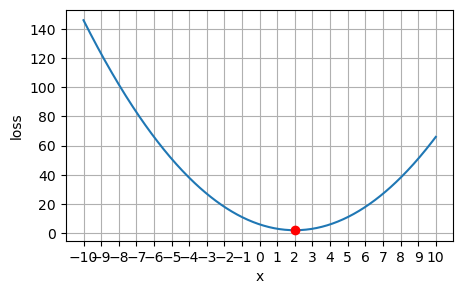

In [2]:
#visualize
fig = plt.figure(figsize=(5, 3))
ax = np.linspace(-10, 10, 400)
plt.plot(ax, loss(ax))
plt.plot(x, loss(x), "ro")
plt.xticks(np.arange(-10, 11, 1))
plt.xlabel("x")
plt.ylabel("loss")
plt.grid()
plt.show()


step 0: a=0.4248184392752342, b=0.3178905369512267 || loss=2490.6817195596677
step 100: a=3.2553150890135742, b=0.8007826417060305 || loss=70.00944164464359
step 200: a=3.2538437813945325, b=0.8546370762335476 || loss=69.7097203160153
step 300: a=3.2459021317750327, b=0.9045444190072042 || loss=69.45469985464773
step 400: a=3.2383812177178544, b=0.9517045621776626 || loss=69.22695844105321
step 500: a=3.2312738972030637, b=0.9962710011462977 || loss=69.02357866339999
step 600: a=3.2245574627067, b=1.038386389506895 || loss=68.841954544335
step 700: a=3.2182104165018313, b=1.0781855293623182 || loss=68.6797588678224
step 800: a=3.2122124430909302, b=1.115795808998609 || loss=68.53491336153834
step 900: a=3.2065443442813955, b=1.1513376106420237 || loss=68.40556206721413


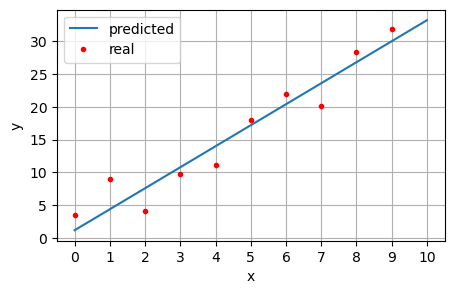

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# find best fit line for data by gradient descent
# y = ax + b
test_data = [3*x + 2 + np.random.rand() * 10 - 5 for x in range(10)]
loss = lambda x, a, b: test_data[x] - (a * x + b)
total_loss = lambda a, b: sum(loss(x, a, b)**2 for x in range(10)) # loss function
dtotal_loss_da = lambda a, b: sum(2 * (loss(x, a, b) * (-x)) for x in range(10))
dtotal_loss_db = lambda a, b: sum(2 * (loss(x, a, b) * (-1)) for x in range(10))
step = 1000
step_size = 0.0001
a = np.random.rand()
b = np.random.rand()
for i in range(step):
    a -= step_size * dtotal_loss_da(a, b)
    b -= step_size * dtotal_loss_db(a, b)
    if i % 100 == 0:
        print(f"step {i}: a={a}, b={b} || loss={total_loss(a, b)}")
#visualize
fig = plt.figure(figsize=(5, 3))
ax = np.linspace(0, 10, 200)
plt.plot(ax, [a*x + b for x in ax], label="predicted")
plt.plot(test_data, 'r.', label="real")
plt.xticks(np.arange(0, 11, 1))
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

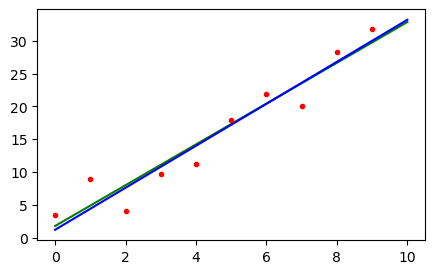

In [4]:
import regression
# find best fit line for data by matrix
# y = a+ bx
matrix_pred = regression.regression_analysis(test_data)
#visualize
fig = plt.figure(figsize=(5, 3))
ax = np.linspace(0, 10, 200)
plt.plot(ax, [matrix_pred(x) for x in ax], 'g', label="predicted")
plt.plot(ax, [a*x + b for x in ax], 'b', label="grad_predicted")
plt.plot(test_data, 'r.', label="real")

In [5]:
#compare predictions loss
squared_loss_matrix = lambda x: (matrix_pred(x) - test_data[x])**2
squared_loss_grad = lambda x: (a*x + b - test_data[x])**2
print(f"matrix loss: {sum(squared_loss_matrix(x) for x in range(10))}")
print(f"grad loss: {sum(squared_loss_grad(x) for x in range(10))}")

matrix loss: [67.3256906]
grad loss: 68.2911392097912
